In [38]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import leastsq
from scipy.special import jvp, yvp
from matplotlib import pyplot as plt
import sympy as sy

In [104]:
def Zmodel(f, R, L, C):
    """ impedance of a series RLC circuit
    """
    w = 2*np.pi*f
    return R + 1j*(w*L - 1/(w*C))

def residuals(params, wf, Z):
    R, L, C = params
    diff = Zmodel(f, R, L, C) - Z
    return diff.real**2 + diff.imag**2

In [105]:
R = [3.35]#np.linspace(2.35, 3.35, 11)
data = [np.loadtxt("TL_Model_Perforated_Plate/fss_%.2f_9.txt" %r, delimiter=",") for r in R]
adata = [np.loadtxt("TL_Model_Perforated_Plate/absorber_%.2f.txt" %r, delimiter=",") for r in R]
D = 74.72e-3 # distance from the port to the FR4 layer
D = 30.92e-3
lz = 0.4e-3
f = data[0][:,0]
phase = np.exp(4j*np.pi*D*f/3e8)
epsFR4 = 4.4*(1-0.02j)
epsFR4 = 4.4 -1j*0.049/(2*np.pi*f*8.85e-12)
Zslab = 1j*377/np.sqrt(epsFR4)*np.tan(2*np.pi*f/3e8*np.sqrt(epsFR4)*lz)
Zabs = adata[0][:,5] + 1j*adata[0][:,6]

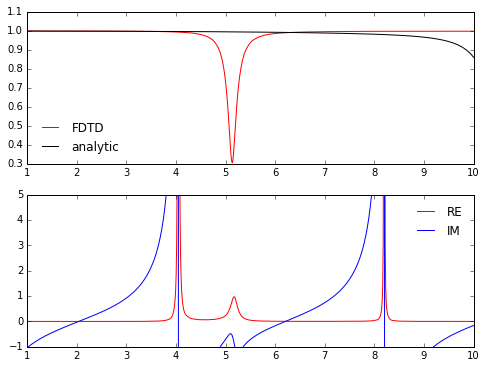

In [129]:
fig = plt.figure(figsize=(8,6))
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)
S11 = (adata[0][:,1]+1j*adata[0][:,2])*phase
Zfss = data[0][:,5]+1j*data[0][:,6]
#Zfss = (1/Zabs - 1/Zslab)**(-1)
Zmeta = Zfss*Zslab/(Zfss+Zslab)
ax1.plot(f/1e9, np.abs(S11), "r-", label="FDTD")
ax1.plot(f/1e9, np.abs((Zmeta-377)/(Zmeta+377)), "k-", label="analytic")
ax1.legend(loc="best").draw_frame(False)
ax2.plot(f/1e9, np.real((1-S11)/(1+S11)), "r-", label="RE")
ax2.plot(f/1e9, np.imag((1-S11)/(1+S11)), "b-", label="IM")

ax2.set_ylim([-1,5])
ax2.legend(loc="best").draw_frame(False)
plt.show()

In [130]:

ydata = leastsq(residuals, x0 = [0.5, 0.49e-9, 1e-12], args=(f, Zfss))

In [131]:
ydata

(array([ 1.48524582e+02, -1.58518144e-09,  8.20653755e-13]), 1)

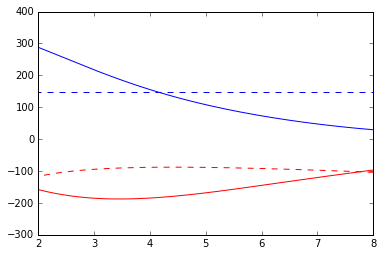

In [134]:
Rr, Ll, Cc = ydata[0]
#Rr, Ll, Cc = 0.65, 0.49e-9, 1e-12
plt.plot(f/1e9, Zfss.imag, "r-")
plt.plot(f/1e9, Zfss.real, "b-")
plt.plot(f/1e9, np.imag(Rr + 1j*(2*np.pi*f*Ll -1/(2*np.pi*f*Cc))), "r--")
plt.plot(f/1e9, np.real(Rr + 1j*(2*np.pi*f*Ll -1/(2*np.pi*f*Cc))), "b--")
plt.xlim([2,8])
#plt.ylim([-80,10])
plt.show()

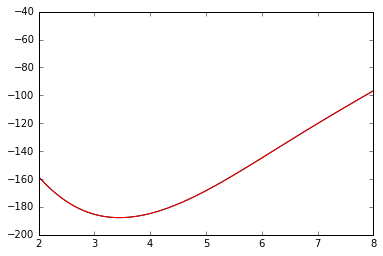

In [136]:
plt.plot(f/1e9, data[0][:,6], "k-")
plt.plot(f/1e9, Zfss.imag, "r-")
plt.xlim([2,8])
#plt.ylim([-50,40])
plt.show()